# 手动实现梯度下降

线性回归的损失函数J(θ)是均方差，即MSE，相关的公式如下：

<img src='./image/sgdformula.png' />

In [177]:
import matplotlib.pyplot as plt

In [234]:
x_train = [100,80,120,75,60,43,140,132,63,55,74,44,88]
y_train = [120,92,143,87,60,50,167,147,80,60,90,57,99]

In [235]:
#步长
alpha = 0.00001
diff = [0,0]
cnt = 0

In [236]:
#计算样本个数
m = len(x_train)
print('样本个数:{0}'.format(m))

样本个数:13


In [237]:
#初始化参数的值，拟合函数为 y=theta0+theta1*x
theta0 = 0
theta1 = 0

In [238]:
#误差
error0=0
error1=0

In [239]:
#退出迭代的两次误差差值的阈值
epsilon=0.000001

线性回归函数

theta1相当于权重，theta0相当于正则项

In [240]:
def yhat(x):
    return theta1*x + theta0

In [241]:
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
#开始迭代
while True:
    cnt=cnt+1
    diff = [0,0]
    #梯度下降，计算正则项theta0的梯度以及权重theta1的梯度
    for i in range(m):
        diff[0]+=yhat(x_train[i])-y_train[i]
        diff[1]+=(yhat(x_train[i])-y_train[i])*x_train[i]
        
    print('diff is {0}'.format(diff))
    # 更新正则项，即正则项 = 正则项 - 学习率 * 正则项的梯度
    theta0=theta0-alpha*diff[0]/m
    # 更新权重，即权重 = 权重 - 学习率 * 权重的梯度
    theta1=theta1-alpha*diff[1]/m

    error1=0
    #计算两次迭代的误差的差值，小于阈值则退出迭代，输出拟合结果
    for i in range(m):
        # 根据公式，应该是error1 += (yhat(x_train[i]) - y_train[i]) ** 2 / (2*m)
        # 但是更多的用法是error1 += (yhat(x_train[i]) - y_train[i]) ** 2 / 2，即无需再除以m
        error1 += (yhat(x_train[i]) - y_train[i]) ** 2 / 2
    
    print('循环次数: {0}, theta0: {1}, theta1: {2}, error0: {3}, error1: {4}'.format(cnt, 
                                                                                 theta0,
                                                                                 theta1,
                                                                                 error0,
                                                                                 error1))
    # 如果新的损失函数的值 - 上一次损失函数的值 < 阈值，即epsilon，则认为足够收敛了，结束梯度下降
    # 梯度下降结束后，训练的权重theta1以及正则项theta0就固定了
    if abs(error1 - error0) < epsilon:
        break
    else:
        error0 = error1

diff is [-1252, -117799]
循环次数: 1, theta0: 0.0009630769230769232, theta1: 0.09061461538461539, error0: 0, error1: 58554.429877298615
diff is [-1154.6673830769232, -108641.54000000001]
循环次数: 2, theta0: 0.0018512826023668642, theta1: 0.17418503076923078, error0: 58554.429877298615, error1: 49827.125734929046
diff is [-1064.9012102800154, -100195.96273331583]
循环次数: 3, theta0: 0.0026704373795053376, theta1: 0.2512588482563968, error0: 49827.125734929046, error1: 42403.96730585639
diff is [-982.1132812866962, -92406.92785164202]
循环次数: 4, theta0: 0.0034259091343412577, theta1: 0.3223411004499676, error0: 42403.96730585639, error1: 36090.07241183112
diff is [-905.7611212979884, -85223.3970553214]
循环次数: 5, theta0: 0.004122648458416633, theta1: 0.38789755972329176, error0: 36090.07241183112, error1: 30719.680669056615
diff is [-835.3444264272252, -78598.29966063648]
循环次数: 6, theta0: 0.004765221094129884, theta1: 0.44835779023147365, error0: 30719.680669056615, error1: 26151.801736172758
diff is 

In [243]:
print('theta0: {0}, theta1: {1}, error0: {2}, error1: {3}'.format(theta0, 
                                                                  theta1, 
                                                                  error0, 
                                                                  error1))

theta0: 0.012382641481688493, theta1: 1.1656309549477624, error0: 151.57135516493335, error1: 151.57135425124002


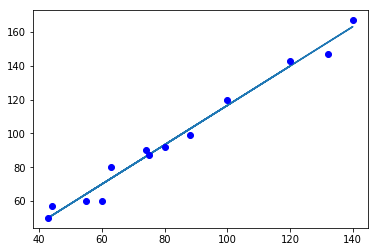

In [244]:
plt.plot(x_train,[yhat(x) for x in x_train])
plt.plot(x_train,y_train,'bo')
plt.show()